# Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).  

The following acoustic properties of each voice are measured and included within the CSV:

**meanfreq:** mean frequency (in kHz)  
**sd:** standard deviation of frequency  
**median:** median frequency (in kHz)  
**Q25:** first quantile (in kHz)  
**Q75:** third quantile (in kHz)  
**IQR:** interquantile range (in kHz)  
**skew:** skewness (see note in specprop description)  
**kurt:** kurtosis (see note in specprop description)  
**sp.ent:** spectral entropy  
**sfm:** spectral flatness  
**mode:** mode frequency  
**centroid:** frequency centroid (see specprop)  
**peakf:** peak frequency (frequency with highest energy)  
**meanfun:** average of fundamental frequency measured across acoustic signal  
**minfun:** minimum fundamental frequency measured across acoustic signal  
**maxfun:** maximum fundamental frequency measured across acoustic signal  
**meandom:** average of dominant frequency measured across acoustic signal  
**mindom:** minimum of dominant frequency measured across acoustic signal  
**maxdom:** maximum of dominant frequency measured across acoustic signal   
**dfrange:** range of dominant frequency measured across acoustic signal  
**modindx:** modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range  
**label:** male or female  

## Import Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

## Load Data

In [2]:
voice_data = pd.read_csv('Gender_Recognition_By_Voice.csv')

## Data Info

In [3]:
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [5]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


## Checking for Missing Values

In [6]:
voice_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

> There are no missing values in the data set.

## Multicolinearity Check

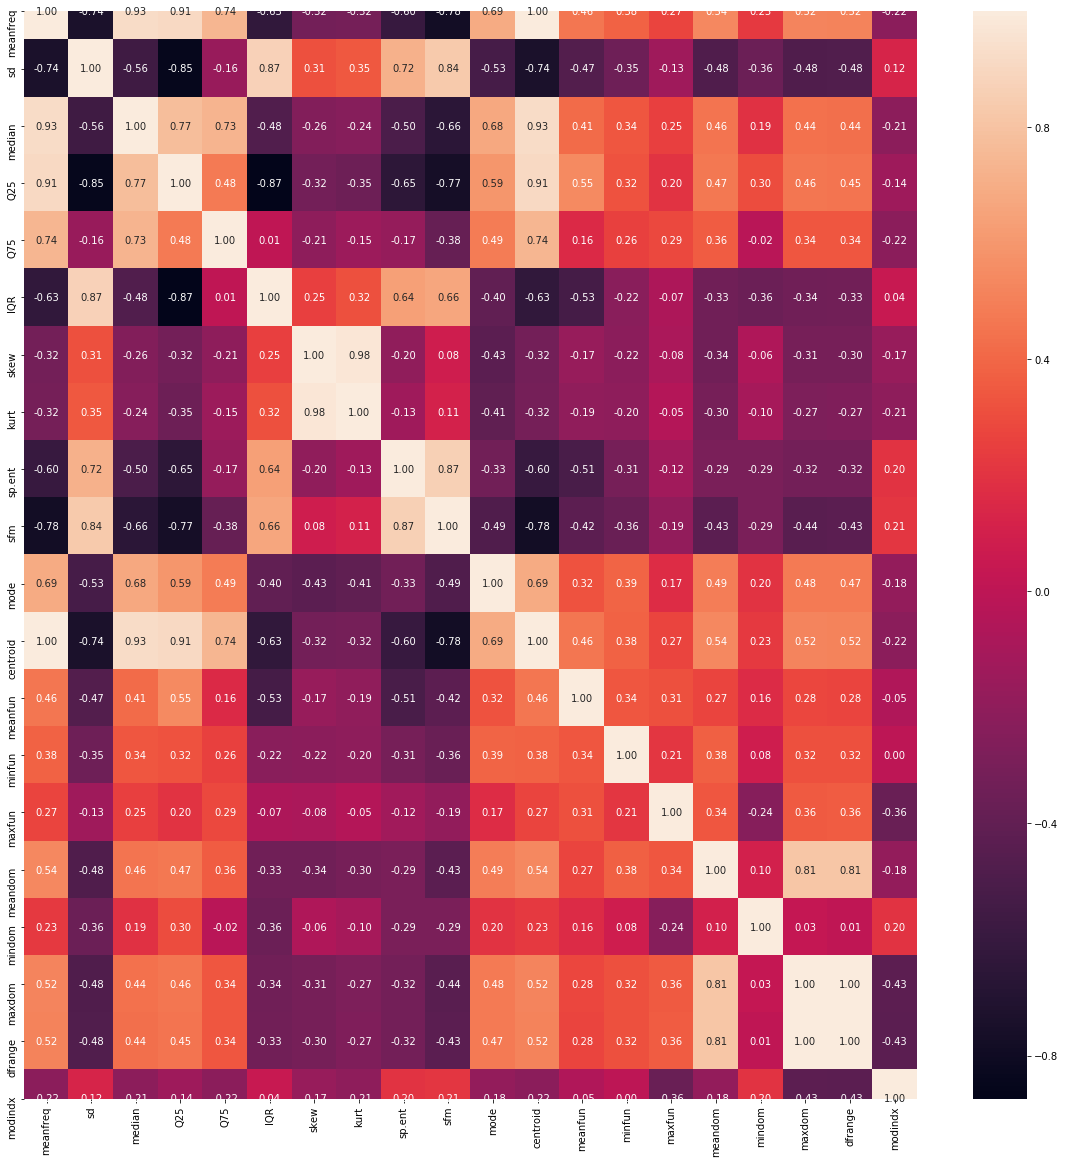

In [7]:
corr_matrx = voice_data.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=corr_matrx, annot=True, cbar=True, fmt='.2f', ax=ax)
plt.show()


> There are couple of correlated features such as 'maxdom' and 'dfrange', 'meanfreq' and 'centroid'. Lets find out those feature pairs for which corr value > 0.93

In [8]:
corr_matrx[(corr_matrx > 0.93) | (corr_matrx < -0.93)]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sd,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q25,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q75,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IQR,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skew,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.97702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kurt,NaN,NaN,NaN,NaN,NaN,NaN,0.97702,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp.ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sfm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dealing with Multicolinearity

> We can see following pairs of features has strong corelation,
- skew and kurt
- meanfreq and centroid
- dfrange and maxdom  

Lets keep one feature from each pair of features . To select which fetaure to keep we can check statistic properties of the features and or outliers etc.

In [9]:
voice_data.describe().iloc[:,[6,7,0,11,17,18]]

,skew,kurt,meanfreq,centroid,maxdom,dfrange
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,3.140168,36.568461,0.180907,0.180907,5.047277,4.994630
std,4.240529,134.928661,0.029918,0.029918,3.521157,3.520039
min,0.141735,2.068455,0.039363,0.039363,0.007812,0.000000
25%,1.649569,5.669547,0.163662,0.163662,2.070312,2.044922
50%,2.197101,8.318463,0.184838,0.184838,4.992188,4.945312
75%,2.931694,13.648905,0.199146,0.199146,7.007812,6.992188
max,34.725453,1309.612887,0.251124,0.251124,21.867188,21.843750


> in the above statistic informations for feature skew(6), kurt(7), meanfreq(0), centroid(11), maxdom(17) and dfrange(18) following inferences can be made , 
- standard deviation of 'kurt' is 134.92 and mean is 36.56. Which means data points are far away from its mean, in other words data points are deviated more from its mean. And also if we see at min and max value we can understand values are not in common scale. fetaure skew would be better .
- stats on features 'meanfreq' and 'centroid' look exactly similar. we can remove any of these feature.
- stats on features 'maxdom' and 'dfrange' look almost similar. we can remove any of these feature.

Lets examine the Distribution of features 'skew' and 'kurt' to check if they follows 'Normal Distribution'.

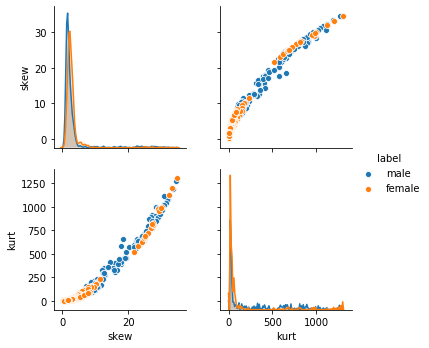

In [10]:
sns.pairplot(data=voice_data , vars=['skew','kurt'], hue='label')
plt.show()

> We can understand from the distribution plots , is that ther are more dtapoints towards right tail in the feature 'kurt' than in the feature 'skew'. So feature 'skew' would  be better choic than 'kurt'  

Lets remove feature 'kurt' , 'meanfreq' and 'maxdom' and retain features 'skew' , 'centroid' and 'dfrange'

In [11]:
voice_data.drop(columns=['kurt','meanfreq','maxdom'], axis=1, inplace=True)

## Seperating Features and Target Variable

In [12]:
X = voice_data.drop(columns=['label'], axis=1)
Y = voice_data.label

## Splitting Training and Testing Data Set

In [13]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)
print('X_Train Shape ', X_Train.shape)
print('X_Test Shape ', X_Test.shape)
print('Y_Train Shape ', Y_Train.shape)
print('Y_Test Shape ', Y_Test.shape)

X_Train Shape  (2534, 17)
X_Test Shape  (634, 17)
Y_Train Shape  (2534,)
Y_Test Shape  (634,)


## Data Preprocessing : Standardization

Lets standardize the features before building the model so that all feature values would be in common scale.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)

## Build Model : Support Vector Machine

In [16]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_Train, Y_Train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
Y_Pred = model.predict(X_Test)

## Evaluate Model

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
matrix = confusion_matrix(Y_Test, Y_Pred)

print(' Confusion Matrix\n', matrix)

print(' Accuracy Score ', accuracy_score(Y_Test,Y_Pred))

 Confusion Matrix
 [[311   5]
 [  5 313]]
 Accuracy Score  0.9842271293375394


> We have achieved a accuracy score of 98%. And also there are only 5 Type 1 and Type 2 Errors.  

> No Kernel  Tricks applied to the data.